### PYTHON IMPLEMENTATION

* Refer https://scikit-learn.org/stable/index.html

### PROBLEM STATEMENT

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
    
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
    
#### FEATURES:
* Date - The date of the observation
* type - Conventional or Organic
* year - year
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

### Target:

The problem statement can been analysed as two different problems such as Regression and Classification problems.

#### For regression target :
* Average Price - The Average price of a single avocado 

#### For Classification target:
* Region - the city or region of the observation


In [2]:
# Import Necessary Libraries 

import numpy as np #numerical python
import pandas as pd #Data manipulation and Analysis

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# For Regression and Classification task
from sklearn.preprocessing import StandardScaler #standardization
from sklearn.linear_model import LinearRegression #Regression
from sklearn.linear_model import LogisticRegression #Classification
from sklearn.model_selection import train_test_split # For splitting the dataset into training and testing set
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, r2_score #Model Evaluation Metrics 

In [3]:
#Load the dataset
df = pd.read_csv("D:/Scifor/Final Projects Machine Learning/Project 10.0/avocado.csv")

In [4]:
#print first 5 rows of the dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


* From the observation of the dataset some features need to be dropped 
* Need to rename the Product Lookup codes to correct feature names as identifiable.

In [5]:
# Shape of the dataset
df.shape

(18249, 14)

In [6]:
# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
# Check Dataset summary
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


* From the observation it shows the dataset has some missing values in some features we need to treat them
* It seems like there is an outliers lets treat them in further steps.

In [8]:
# Check the null values for proof
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### DATA PREPROCESSING

In [9]:
# Lets drop the features that is unimportant for the analysis
df.drop(columns=["Unnamed: 0","Date"], inplace=True)

In [10]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [11]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
# Lets treat missing values count of by value_counts of features
df['4046'].value_counts()

4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64

In [13]:
df['4046'].mean()

293008.4245306592

* Since there are 242 values of 0.00 lets replace them with mean values

In [14]:
df['4046'].replace(to_replace=0.00,value=df['4046'].mean(),inplace=True)

In [15]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [16]:
# Lets treat missing value of 4225 feature 
df['4225'].value_counts()

4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: count, Length: 18103, dtype: int64

In [17]:
df['4225'].mean()

295154.56835607433

In [18]:
df['4225'].replace(to_replace=0.00,value=df['4225'].mean(),inplace=True)

In [19]:
df['4225'].value_counts()

4225
295154.568356    61
177.870000        3
215.360000        3
1.300000          3
1.260000          3
                 ..
417905.670000     1
275986.910000     1
277789.300000     1
378155.000000     1
2356.130000       1
Name: count, Length: 18103, dtype: int64

In [20]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.961412e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [21]:
# Lets treat 4770 feature missing values to replace with missing values
df['4770'].value_counts()

4770
0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: count, Length: 12071, dtype: int64

In [22]:
df['4770'].mean()

22839.73599265713

In [23]:
df['4770'].replace(to_replace=0.00,value=df['4770'].mean(),inplace=True)

In [24]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.961412e+05,2.971957e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.065084e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,8.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,3.786500e+02,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.111933e+04,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,2.283974e+04,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [25]:
#Lets treat Total Bags, Small Bags, Large Bags, XLarge Bags missing values with mean values
print(df['Total Bags'].value_counts())
print(df['Small Bags'].value_counts())
print(df['Large Bags'].value_counts())
print(df['XLarge Bags'].value_counts())

Total Bags
0.00         15
990.00        5
300.00        5
550.00        4
266.67        4
             ..
90196.05      1
130858.02     1
510679.10     1
84522.00      1
12014.15      1
Name: count, Length: 18097, dtype: int64
Small Bags
0.00        159
203.33       11
223.33       10
533.33       10
123.33        8
           ... 
14002.00      1
32441.00      1
29560.96      1
22077.20      1
11988.14      1
Name: count, Length: 17321, dtype: int64
Large Bags
0.00          2370
3.33           187
6.67            78
10.00           47
4.44            38
              ... 
2528089.14       1
2287449.76       1
731388.25        1
673464.14        1
26.01            1
Name: count, Length: 15082, dtype: int64
XLarge Bags
0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: count, Length: 5588, dtype: int64


In [26]:
print(f'Total Bags mean:', df['Total Bags'].mean())
print(f'Small Bags mean:',df['Small Bags'].mean())
print(f'Large Bags mean:',df['Large Bags'].mean())
print(f'XLarge Bags mean:',df['XLarge Bags'].mean())

Total Bags mean: 239639.20205983886
Small Bags mean: 182194.68669570936
Large Bags mean: 54338.08814455587
XLarge Bags mean: 3106.426507205874


In [27]:
df['Total Bags'].replace(to_replace=0.00,value=df['Total Bags'].mean(),inplace=True)
df['Small Bags'].replace(to_replace=0.00,value=df['Small Bags'].mean(),inplace=True)
df['Large Bags'].replace(to_replace=0.00,value=df['Large Bags'].mean(),inplace=True)
df['XLarge Bags'].replace(to_replace=0.00,value=df['XLarge Bags'].mean(),inplace=True)

In [28]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.968940e+05,2.961412e+05,2.971957e+04,2.398362e+05,1.837821e+05,6.139498e+04,5157.291024,2016.147899
std,0.402677,3.453545e+06,1.264533e+06,1.203999e+06,1.065084e+05,9.862184e+05,7.459830e+05,2.430763e+05,17391.406970,0.939938
min,0.440000,8.456000e+01,1.000000e+00,1.260000e+00,8.300000e-01,3.090000e+00,2.520000e+00,9.700000e-01,1.000000,2015.000000
25%,1.100000,1.083858e+04,9.750900e+02,3.086950e+03,3.786500e+02,5.108010e+03,3.125050e+03,9.187500e+02,3106.426507,2015.000000
50%,1.370000,1.073768e+05,9.954770e+03,2.977364e+04,1.111933e+04,3.992521e+04,2.787623e+04,7.942080e+03,3106.426507,2016.000000
75%,1.660000,4.329623e+05,1.217699e+05,1.542584e+05,2.283974e+04,1.112384e+05,8.620928e+04,5.433809e+04,3106.426507,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


* We have treated all missing values to their mean values

#### Data visualization

Text(0.5, 1.0, 'Type of Avacodos and its Average Price that were highly sold in years')

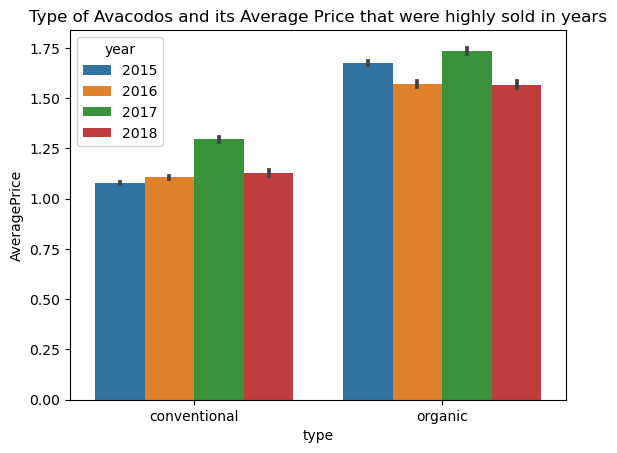

In [29]:
# Lets Visualize type of Avocado with Average price with comparison of year

sns.barplot(data = df, x='type', y='AveragePrice', hue ='year')
plt.title('Type of Avacodos and its Average Price that were highly sold in years')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


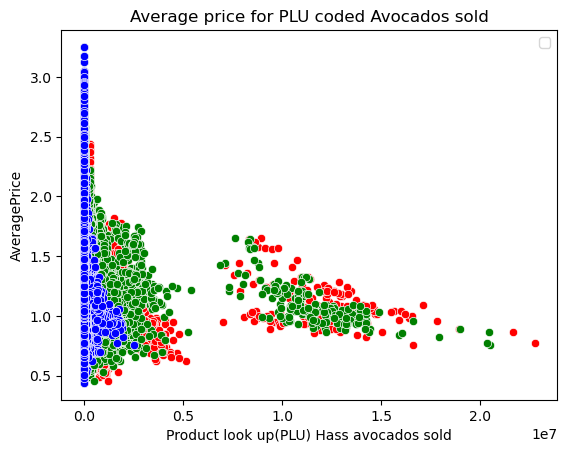

In [30]:
# Lets visualize the PLU Hass Avocados with their Average price 
sns.scatterplot(data = df, x ='4046', y ='AveragePrice', color='r')
sns.scatterplot(data = df, x ='4225', y ='AveragePrice', color='g')
sns.scatterplot(data = df, x ='4770', y ='AveragePrice', color='b')
plt.xlabel('Product look up(PLU) Hass avocados sold')
plt.title('Average price for PLU coded Avocados sold')
plt.legend()
plt.show()

In [31]:
# Lets sort the values for visualize Top selling region and for its average price
d1 = df.sort_values(by=['4046','4225','4770','AveragePrice','region'], ascending=False)

In [32]:
d2=d1.head(500)
d2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
8366,0.77,61034457.10,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017,TotalUS
9097,0.87,62505646.52,21620180.90,20445501.03,1066830.22,19373134.37,13384586.80,5719096.61,269450.96,conventional,2018,TotalUS
2699,0.89,44655461.51,18933038.04,18956479.74,1381516.11,5384427.62,4216452.03,1121076.47,46899.12,conventional,2015,TotalUS
2686,0.96,41291704.39,17787611.93,16602589.04,1118329.50,5783173.92,4647155.48,1110987.23,25031.21,conventional,2015,TotalUS
8353,1.09,47293921.60,17076650.82,13549102.59,863471.88,15804696.31,11228049.63,4324231.19,252415.49,conventional,2017,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...
5967,1.17,6370622.30,2375685.35,1570244.89,134825.51,2289866.55,2216400.16,4798.87,68667.52,conventional,2017,California
8014,1.34,4488892.01,2373892.08,775342.08,7963.75,1331694.10,952665.50,378804.94,223.66,conventional,2017,SouthCentral
1169,0.96,3435374.51,2373501.16,564583.23,99097.11,398193.01,377663.89,17234.66,3294.46,conventional,2015,LosAngeles
9040,1.31,4198992.14,2371136.88,403224.01,17012.38,1407618.87,845928.49,540110.99,21579.39,conventional,2018,Southeast


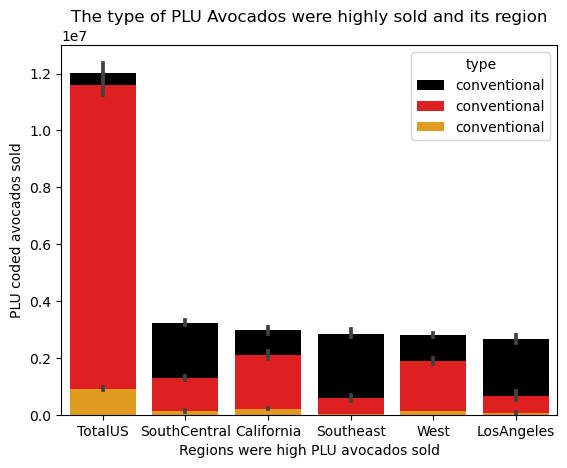

In [33]:
# Lets visualize high PLU coded avocados sold with region and difference with type of avocados
sns.barplot(data = d2, x ='region', y ='4046', hue='type', palette=['black','yellow'])
sns.barplot(data = d2, x ='region', y ='4225', hue='type', palette=['red','green'])
sns.barplot(data = d2, x ='region', y ='4770', hue='type', palette=['orange','blue'])
plt.xlabel('Regions were high PLU avocados sold')
plt.ylabel('PLU coded avocados sold')
plt.title('The type of PLU Avocados were highly sold and its region')
plt.show()

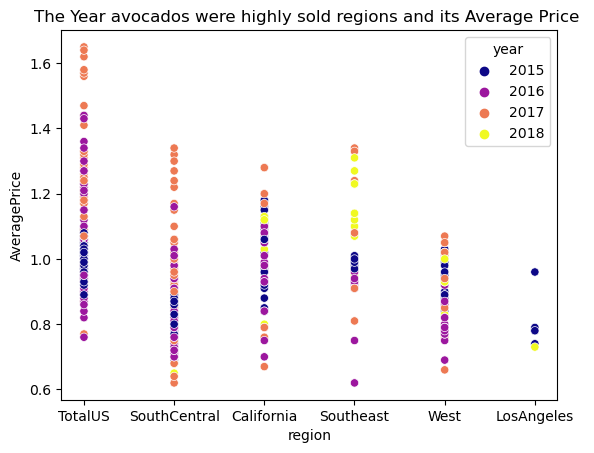

In [34]:
# lets visualize highly sold avocados region and their average price with their year
sns.scatterplot(data=d2, x='region',y='AveragePrice', hue='year', palette='plasma')
plt.title('The Year avocados were highly sold regions and its Average Price ')
plt.show()

In [35]:
# Lets rename the columns of PLU code
df.rename(columns ={'Total Volume':'Total_Volume','4046':'PLU_4046_avcd', '4225':'PLU_4225_avcd', '4770':'PLU_4770_avcd','Total Bags':'Total_Bags','Small Bags':'Small_Bags','Large Bags':'Large_Bags','XLarge Bags':'XLarge_Bags'},inplace=True)
df.head()

,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,conventional,2015,Albany


In [36]:
df.region.value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [37]:
# Label encode the categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the 'type' column
df['type'] = le.fit_transform(df['type'])

# Fit and transform the 'region' column
df['region'] = le.fit_transform(df['region'])

df.head()

,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,3106.426507,0,2015,0


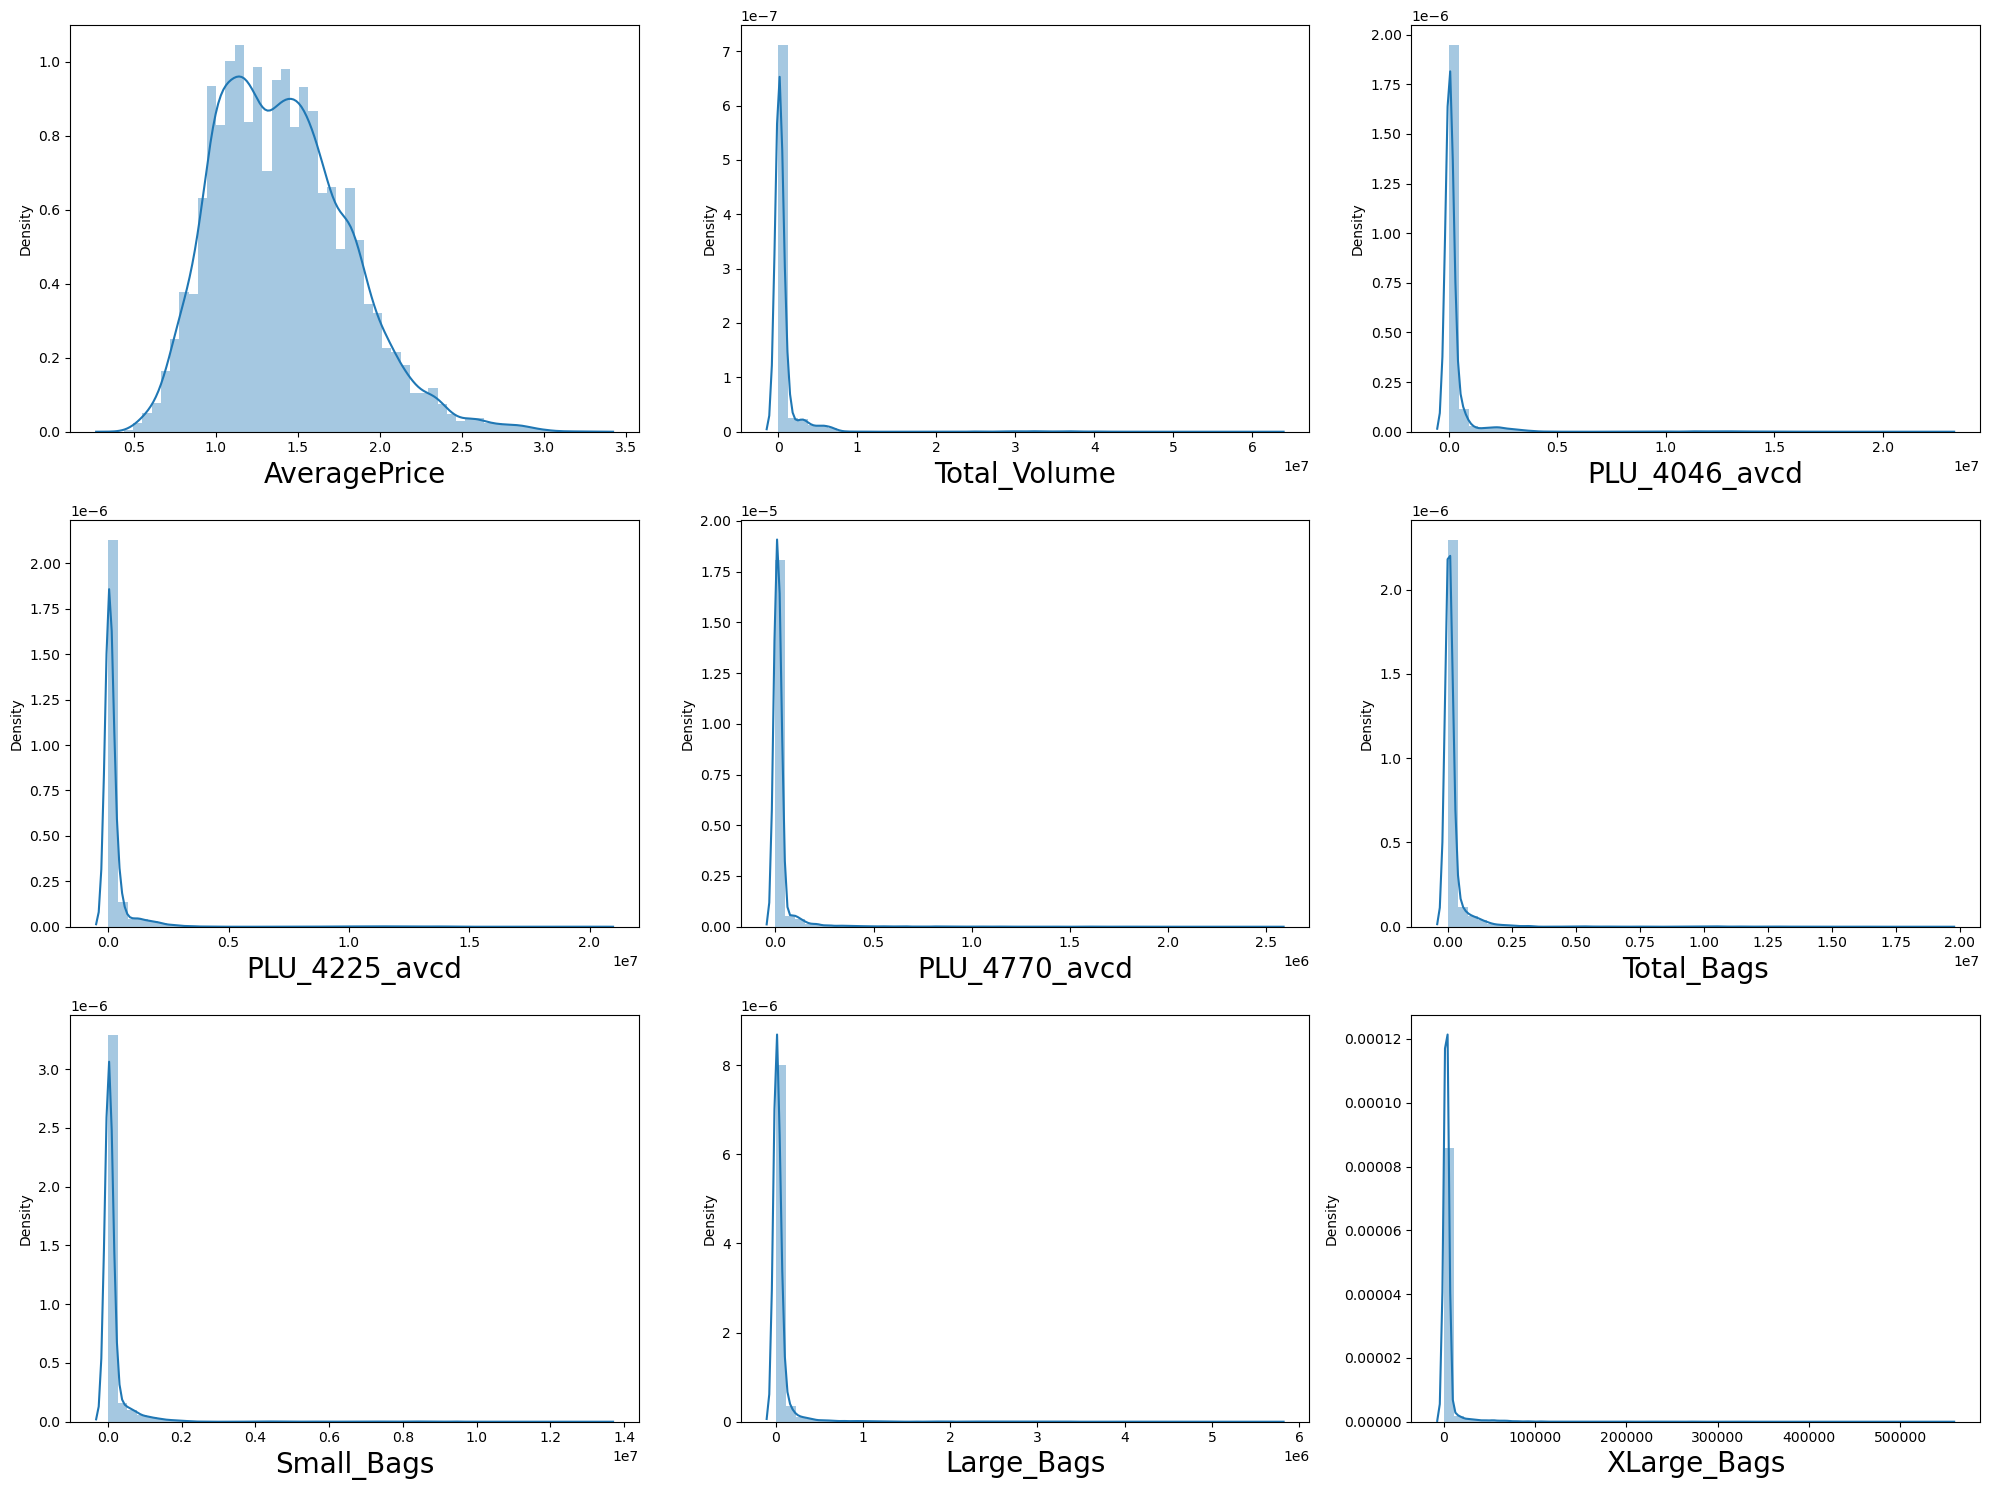

In [38]:
# Plotting for data distribution
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.tight_layout()

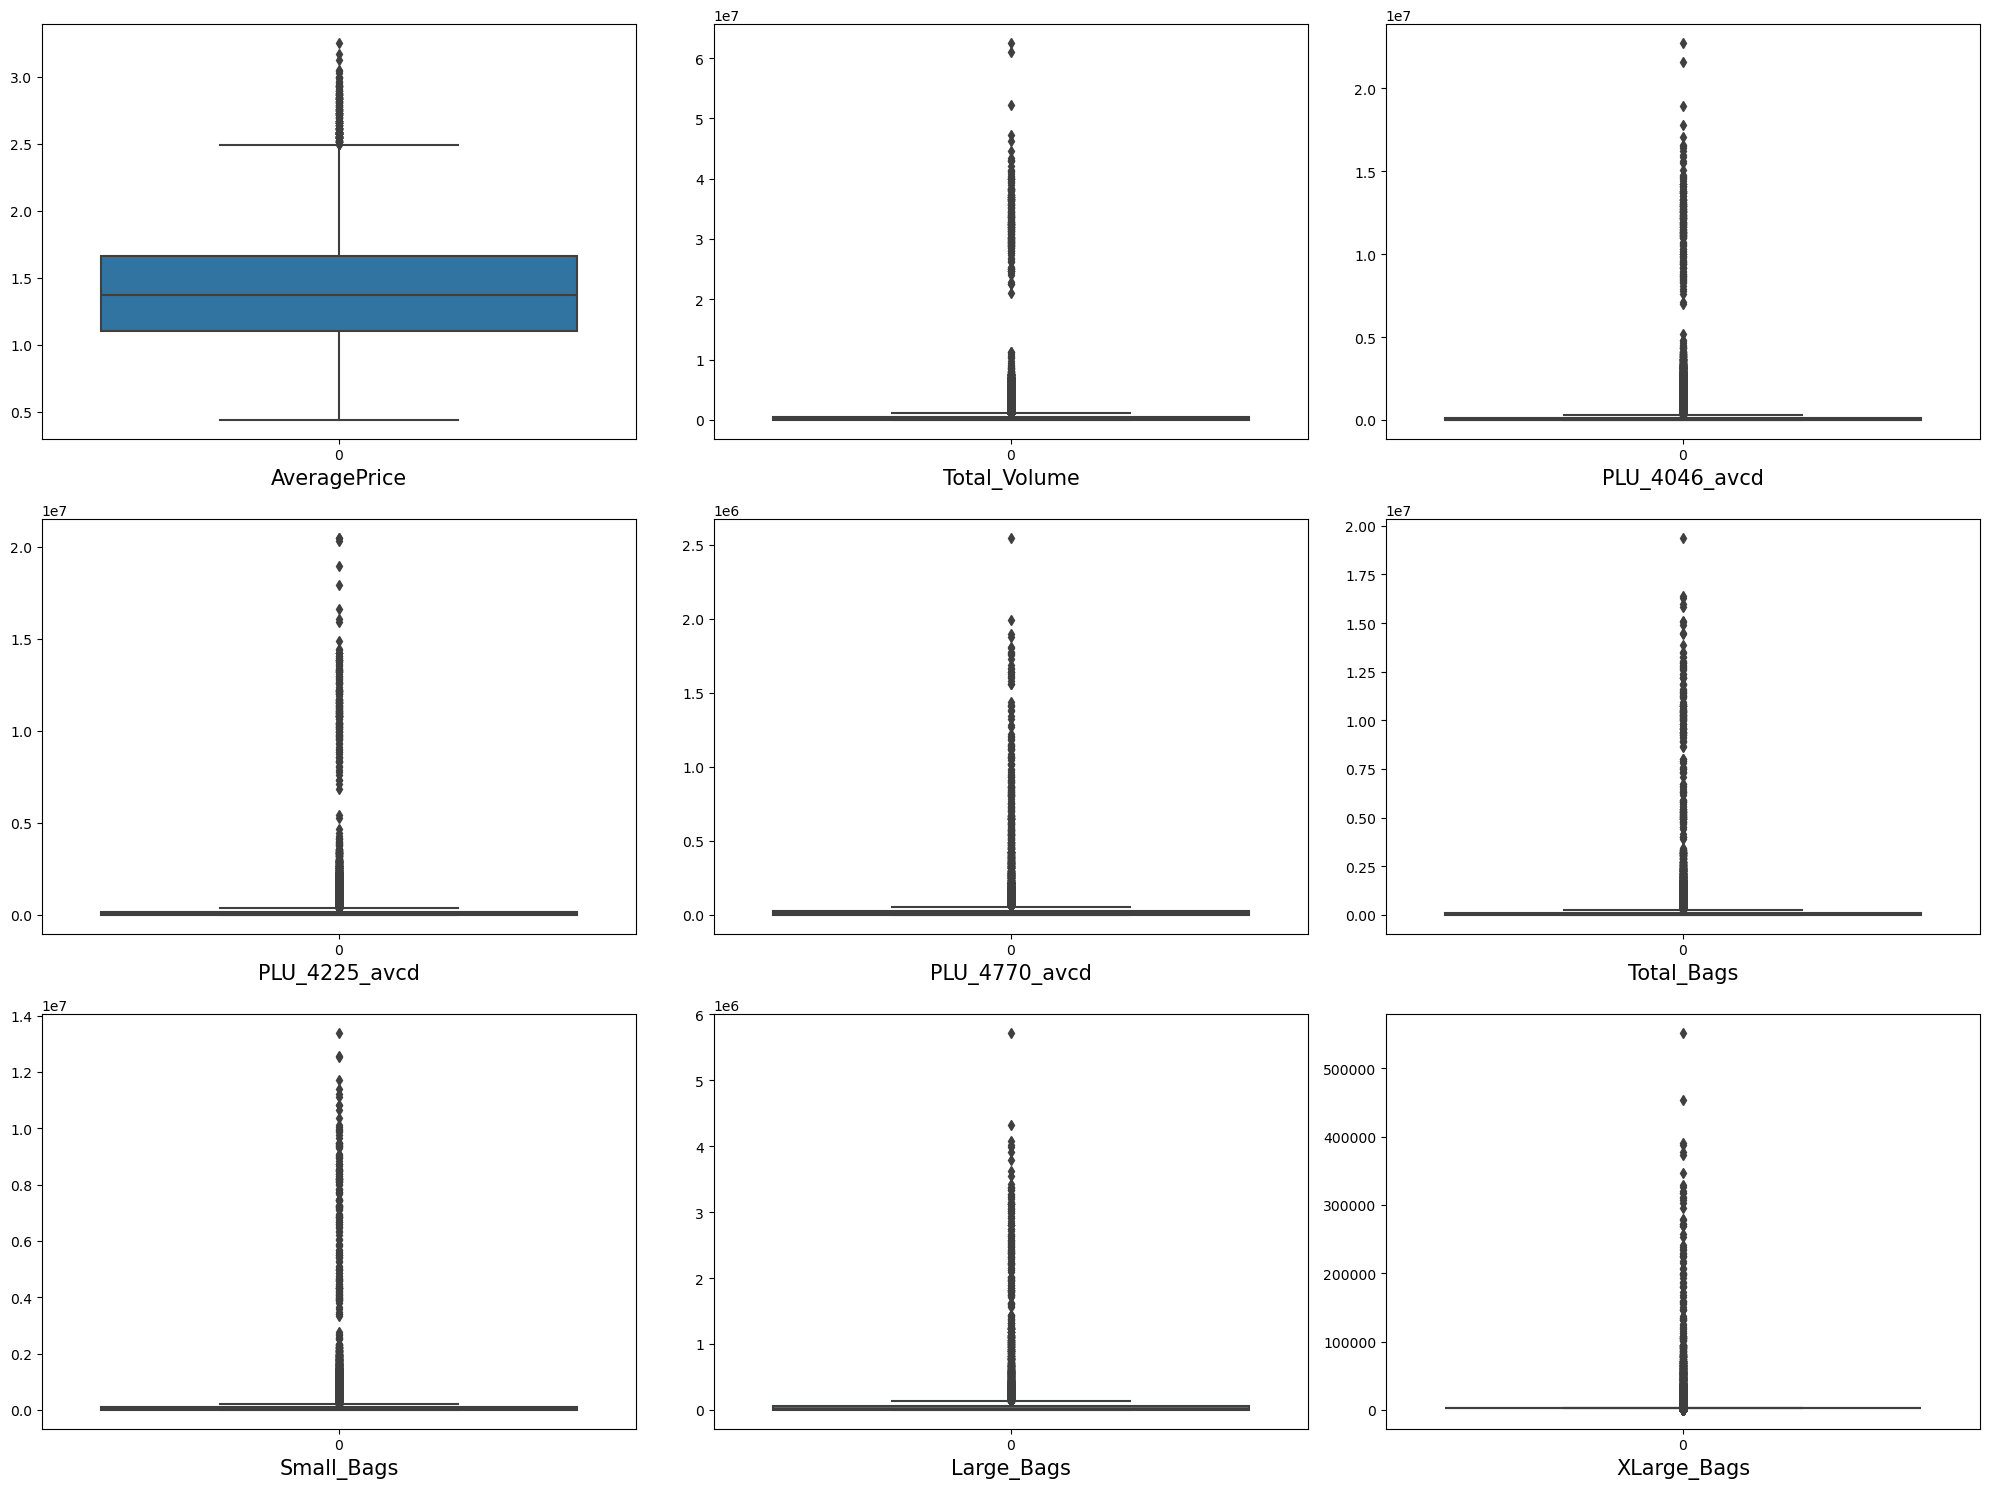

In [39]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

In [40]:
# Lets treat Outliers
#1st quantile
q1=df.quantile(0.25)

In [41]:
#3rd quantile
q3=df.quantile(0.75)

In [42]:
#IQR
IQR =q3  - q1

In [43]:
print(q1)
print(q3)
print(IQR)

AveragePrice         1.100000
Total_Volume     10838.580000
PLU_4046_avcd      975.090000
PLU_4225_avcd     3086.950000
PLU_4770_avcd      378.650000
Total_Bags        5108.010000
Small_Bags        3125.050000
Large_Bags         918.750000
XLarge_Bags       3106.426507
type                 0.000000
year              2015.000000
region              13.000000
Name: 0.25, dtype: float64
AveragePrice          1.660000
Total_Volume     432962.290000
PLU_4046_avcd    121769.890000
PLU_4225_avcd    154258.390000
PLU_4770_avcd     22839.735993
Total_Bags       111238.440000
Small_Bags        86209.280000
Large_Bags        54338.088145
XLarge_Bags        3106.426507
type                  1.000000
year               2017.000000
region               40.000000
Name: 0.75, dtype: float64
AveragePrice          0.560000
Total_Volume     422123.710000
PLU_4046_avcd    120794.800000
PLU_4225_avcd    151171.440000
PLU_4770_avcd     22461.085993
Total_Bags       106130.430000
Small_Bags        83084.2300

In [44]:
#Validating Total Volume Outlier
pred_high = (q3.Total_Volume + (1.5 * IQR.Total_Volume))
pred_high

1066147.855

In [45]:
#Check the indexes which have higher values
index=np.where(df['Total_Volume']>pred_high)
index

(array([  312,   313,   314, ..., 18222, 18223, 18224], dtype=int64),)

In [46]:
df=df.drop(df.index[index])

In [47]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15947,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
15948,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
15949,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
15950,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [48]:
#Validating PLU_4046_avcd Outlier
pred_high = (q3.PLU_4046_avcd + (1.5 * IQR.PLU_4046_avcd))
pred_high

302962.09

In [49]:
#Check the indexes which have higher values
index=np.where(df['PLU_4046_avcd']>pred_high)
index

(array([  54,   66,   68,   71,   72,   73,   74,   75,   76,   77,   78,
          79,   80,   81,   82,   83,   84,   85,   86,   87,   88,   89,
          90,   91,   92,   93,   94,   95,   96,   97,   98,   99,  100,
         101,  102,  103,  519,  520,  521,  522,  523,  524,  525,  526,
         527,  528,  529,  530,  531,  792,  793,  794,  795,  796,  797,
         798,  799,  800,  801,  802,  803,  804,  805,  806,  807,  808,
         809,  810,  811,  812,  813,  814,  815,  816,  817,  818,  819,
         820,  821,  822,  823, 1032, 1034, 1036, 1037, 1040, 1043, 1044,
        1046, 1048, 1052, 1055, 1057, 1059, 1061, 1063, 1064, 1065, 1066,
        1067, 1068, 1069, 1070, 1072, 1075, 1079, 1083, 1279, 1292, 1349,
        1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360,
        1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371,
        1709, 1711, 1712, 1713, 1714, 1717, 1718, 1726, 1727, 1729, 1731,
        1734, 2077, 2080, 2083, 2086, 

In [50]:
df=df.drop(df.index[index])

In [51]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15421,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
15422,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
15423,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
15424,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [52]:
#Validating PLU_4225_avcd Outlier
pred_high = (q3.PLU_4225_avcd + (1.5 * IQR.PLU_4225_avcd))
pred_high

381015.55000000005

In [53]:
#Check the indexes which have higher values
index=np.where(df['PLU_4225_avcd']>pred_high)
index

(array([   68,    69,    70,    71,    73,    74,    75,    76,    77,
           78,    79,    80,    81,    82,    83,    84,    85,    86,
           87,    88,    89,    90,    91,    92,    93,    94,    95,
           96,    97,    98,    99,   100,   101,   102,   103,   104,
          105,   106,   107,   108,   109,   111,   112,   114,   115,
          116,   117,   118,   119,   173,   174,   175,   177,   178,
          179,   180,   181,   182,   184,   185,   186,   187,   188,
          189,   190,   191,   192,   193,   194,   195,   196,   197,
          198,   199,   200,   201,   202,   203,   205,   206,   208,
          215,   218,   223,   328,   329,   330,   331,   332,   333,
          334,   335,   336,   337,   338,   339,   340,   341,   342,
          343,   344,   345,   346,   347,   348,   349,   350,   351,
          352,   353,   354,   355,   356,   357,   358,   359,   360,
          361,   362,   363,   364,   365,   366,   367,   368,   369,
      

In [54]:
df=df.drop(df.index[index])

In [55]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14819,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
14820,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
14821,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
14822,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [56]:
#Validating PLU_4770_avcd Outlier
pred_high = (q3.PLU_4770_avcd + (1.5 * IQR.PLU_4770_avcd))
pred_high

56531.36498164282

In [57]:
#Check the indexes which have higher values
index=np.where(df['PLU_4770_avcd']>pred_high)
index

(array([ 203,  205,  208,  226,  236,  239,  366,  369,  370,  371,  373,
         374,  375,  376,  377,  378,  379,  380,  381,  382,  383,  384,
         385,  386,  387,  388,  389,  390,  391,  393,  394,  395,  398,
         400,  401,  402,  406,  409,  413,  416,  417, 1166, 1169, 1171,
        1174, 1192, 1202, 1205, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
        2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
        2170, 2200, 2201, 2203, 2206, 2207, 2210, 2212, 2213, 2214, 2215,
        2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2381,
        2756, 2757, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845,
        3846, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 4048,
        4058, 4067, 4071, 4095, 4101, 4696, 5487, 5494, 5499, 5503, 5506,
        5508], dtype=int64),)

In [58]:
df=df.drop(df.index[index])

In [59]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14697,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
14698,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
14699,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
14700,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [60]:
#Validating Total_Bags Outlier
pred_high = (q3.Total_Bags + (1.5 * IQR.Total_Bags))
pred_high

270434.085

In [61]:
#Check the indexes which have higher values
index=np.where(df['Total_Bags']>pred_high)
index

(array([  344,   345,   347,  1069,  1374,  1377,  1759,  1760,  1761,
         2062,  2063,  2064,  2065,  2067,  2068,  2071,  2072,  2073,
         2074,  2075,  2076,  2077,  2078,  2079,  2081,  2082,  2083,
         2084,  2085,  2086,  2087,  2088,  2089,  2090,  2091,  2092,
         2093,  2094,  2095,  2096,  2097,  2098,  2099,  2100,  2101,
         2102,  2104,  2105,  2106,  2505,  2786,  2839,  2840,  2841,
         2842,  2848,  2849,  2850,  2851,  2852,  2853,  2854,  2855,
         2856,  2857,  2858,  2859,  2860,  2861,  2862,  2863,  2864,
         2865,  2866,  2867,  2868,  2869,  2870,  2871,  2872,  2873,
         2874,  2875,  2876,  2877,  2878,  2879,  2880,  2881,  2882,
         2883,  2884,  2885,  2886,  2887,  2888,  2889,  2890,  3138,
         3140,  3141,  3144,  3146,  3161,  3162,  3168,  3169,  3170,
         3171,  3172,  3173,  3174,  3175,  3176,  3177,  3178,  3179,
         3180,  3181,  3182,  3183,  3184,  3185,  3186,  3187,  3188,
      

In [62]:
df=df.drop(df.index[index])

In [63]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14352,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
14353,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
14354,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
14355,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [64]:
#Validating Small_Bags Outlier
pred_high = (q3.Small_Bags + (1.5 * IQR.Small_Bags))
pred_high

210835.625

In [65]:
#Check the indexes which have higher values
index=np.where(df['Small_Bags']>pred_high)
index

(array([ 1068,  1073,  1376,  1838,  2723,  2788,  2789,  2790,  2791,
         3043,  3056,  3057,  3058,  3059,  3060,  3061,  3191,  3741,
         3752,  3754,  3756,  4696,  4699,  4703,  4715,  4745,  5060,
         5096,  5255, 12466, 12467, 12468, 12469, 12471, 14034, 14077],
       dtype=int64),)

In [66]:
df=df.drop(df.index[index])

In [67]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14316,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
14317,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
14318,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
14319,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


In [68]:
#Validating Large_Bags Outlier
pred_high = (q3.Large_Bags + (1.5 * IQR.Large_Bags))
pred_high

134467.09536138969

In [69]:
#Check the indexes which have higher values
index=np.where(df['Large_Bags']>pred_high)
index

(array([  342,   343,   345,   346,  1748,  1749,  1750,  1944,  1946,
         1947,  1952,  1953,  1955,  1956,  1958,  2049,  2050,  2051,
         2053,  2449,  2450,  2458,  2663,  3024,  3025,  3585,  3588,
         3589,  3599,  3600,  3601,  3607,  3608,  3610,  3611,  3612,
         3613,  3616,  3618,  3620,  3621,  3622,  3623,  3624,  3625,
         3626,  3627,  3628,  3629,  3631,  3685,  3686,  3687,  3688,
         3689,  3690,  3692,  4031,  4032,  4034,  4035,  4044,  4045,
         4048,  4049,  4252,  4990,  4993,  7990, 10789, 10827, 10828,
        10829, 10832, 10837, 11715, 11729, 11730, 13592, 13619, 13620,
        13628, 13636, 14300, 14304], dtype=int64),)

In [70]:
df=df.drop(df.index[index])

In [71]:
df.reset_index()

,index,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.160000,8696.87,8603.62,93.25,3106.426507,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.330000,9505.56,9408.07,97.49,3106.426507,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.500000,8145.35,8042.21,103.14,3106.426507,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.580000,5811.16,5677.40,133.76,3106.426507,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.780000,6183.95,5986.26,197.69,3106.426507,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14231,18244,1.63,17074.83,2046.96,1529.20,22839.735993,13498.67,13066.82,431.85,3106.426507,1,2018,53
14232,18245,1.71,13888.04,1191.70,3431.50,22839.735993,9264.84,8940.04,324.80,3106.426507,1,2018,53
14233,18246,1.87,13766.76,1191.92,2452.79,727.940000,9394.11,9351.80,42.31,3106.426507,1,2018,53
14234,18247,1.93,16205.22,1527.63,2981.04,727.010000,10969.54,10919.54,50.00,3106.426507,1,2018,53


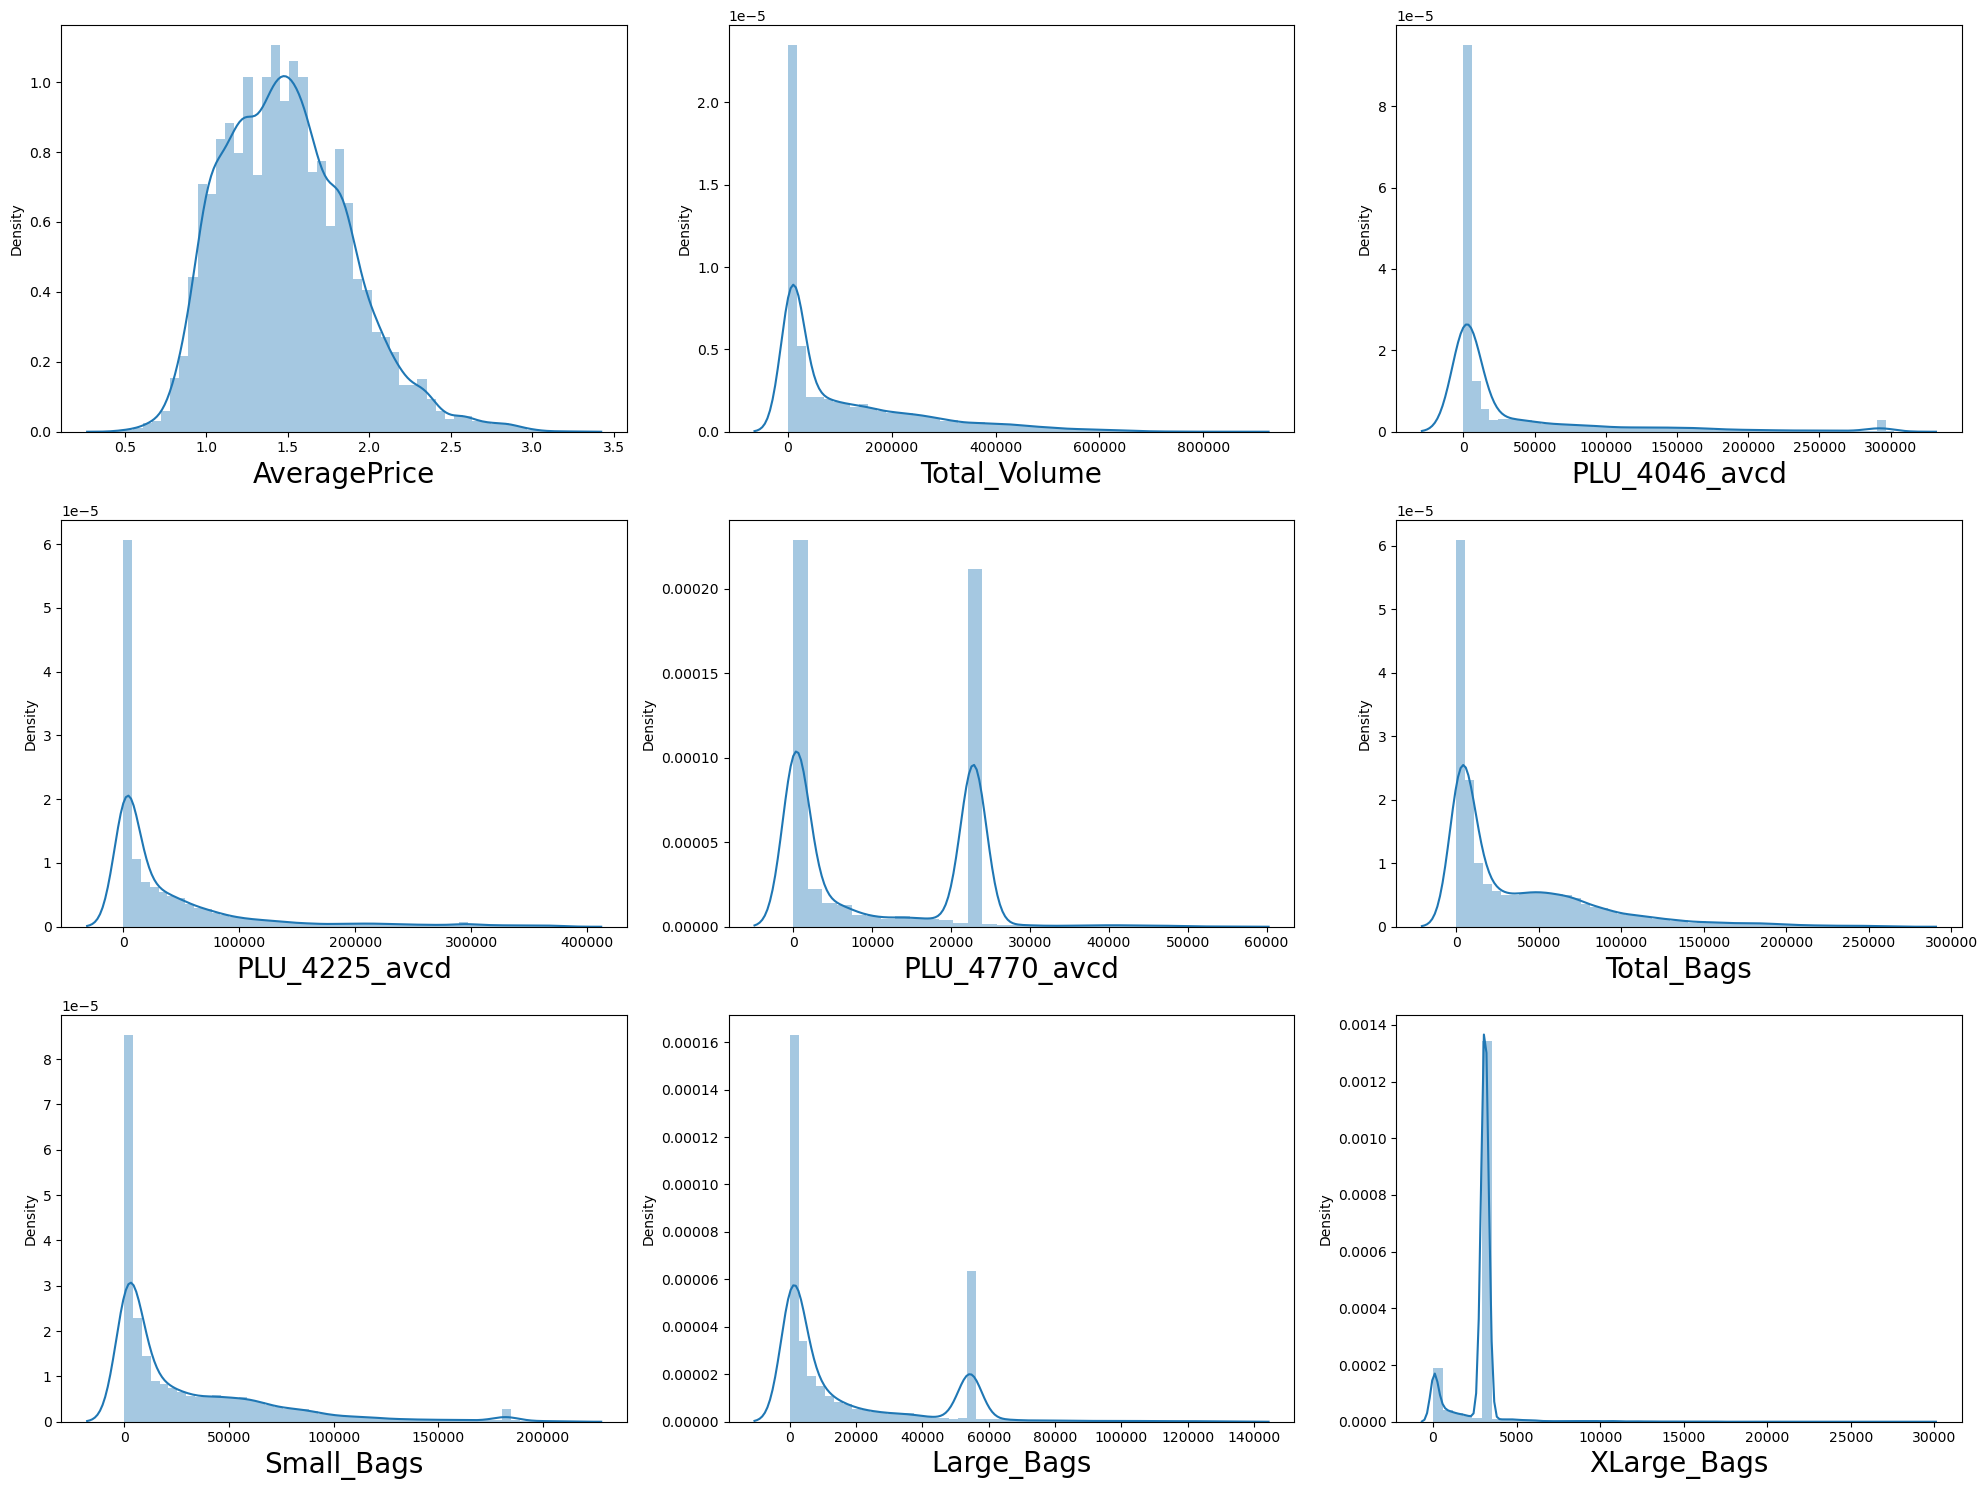

In [72]:
# After treating outliers plotting the distribution
plt.figure(figsize=(20,15))
plotnumber = 1
for column in df :
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

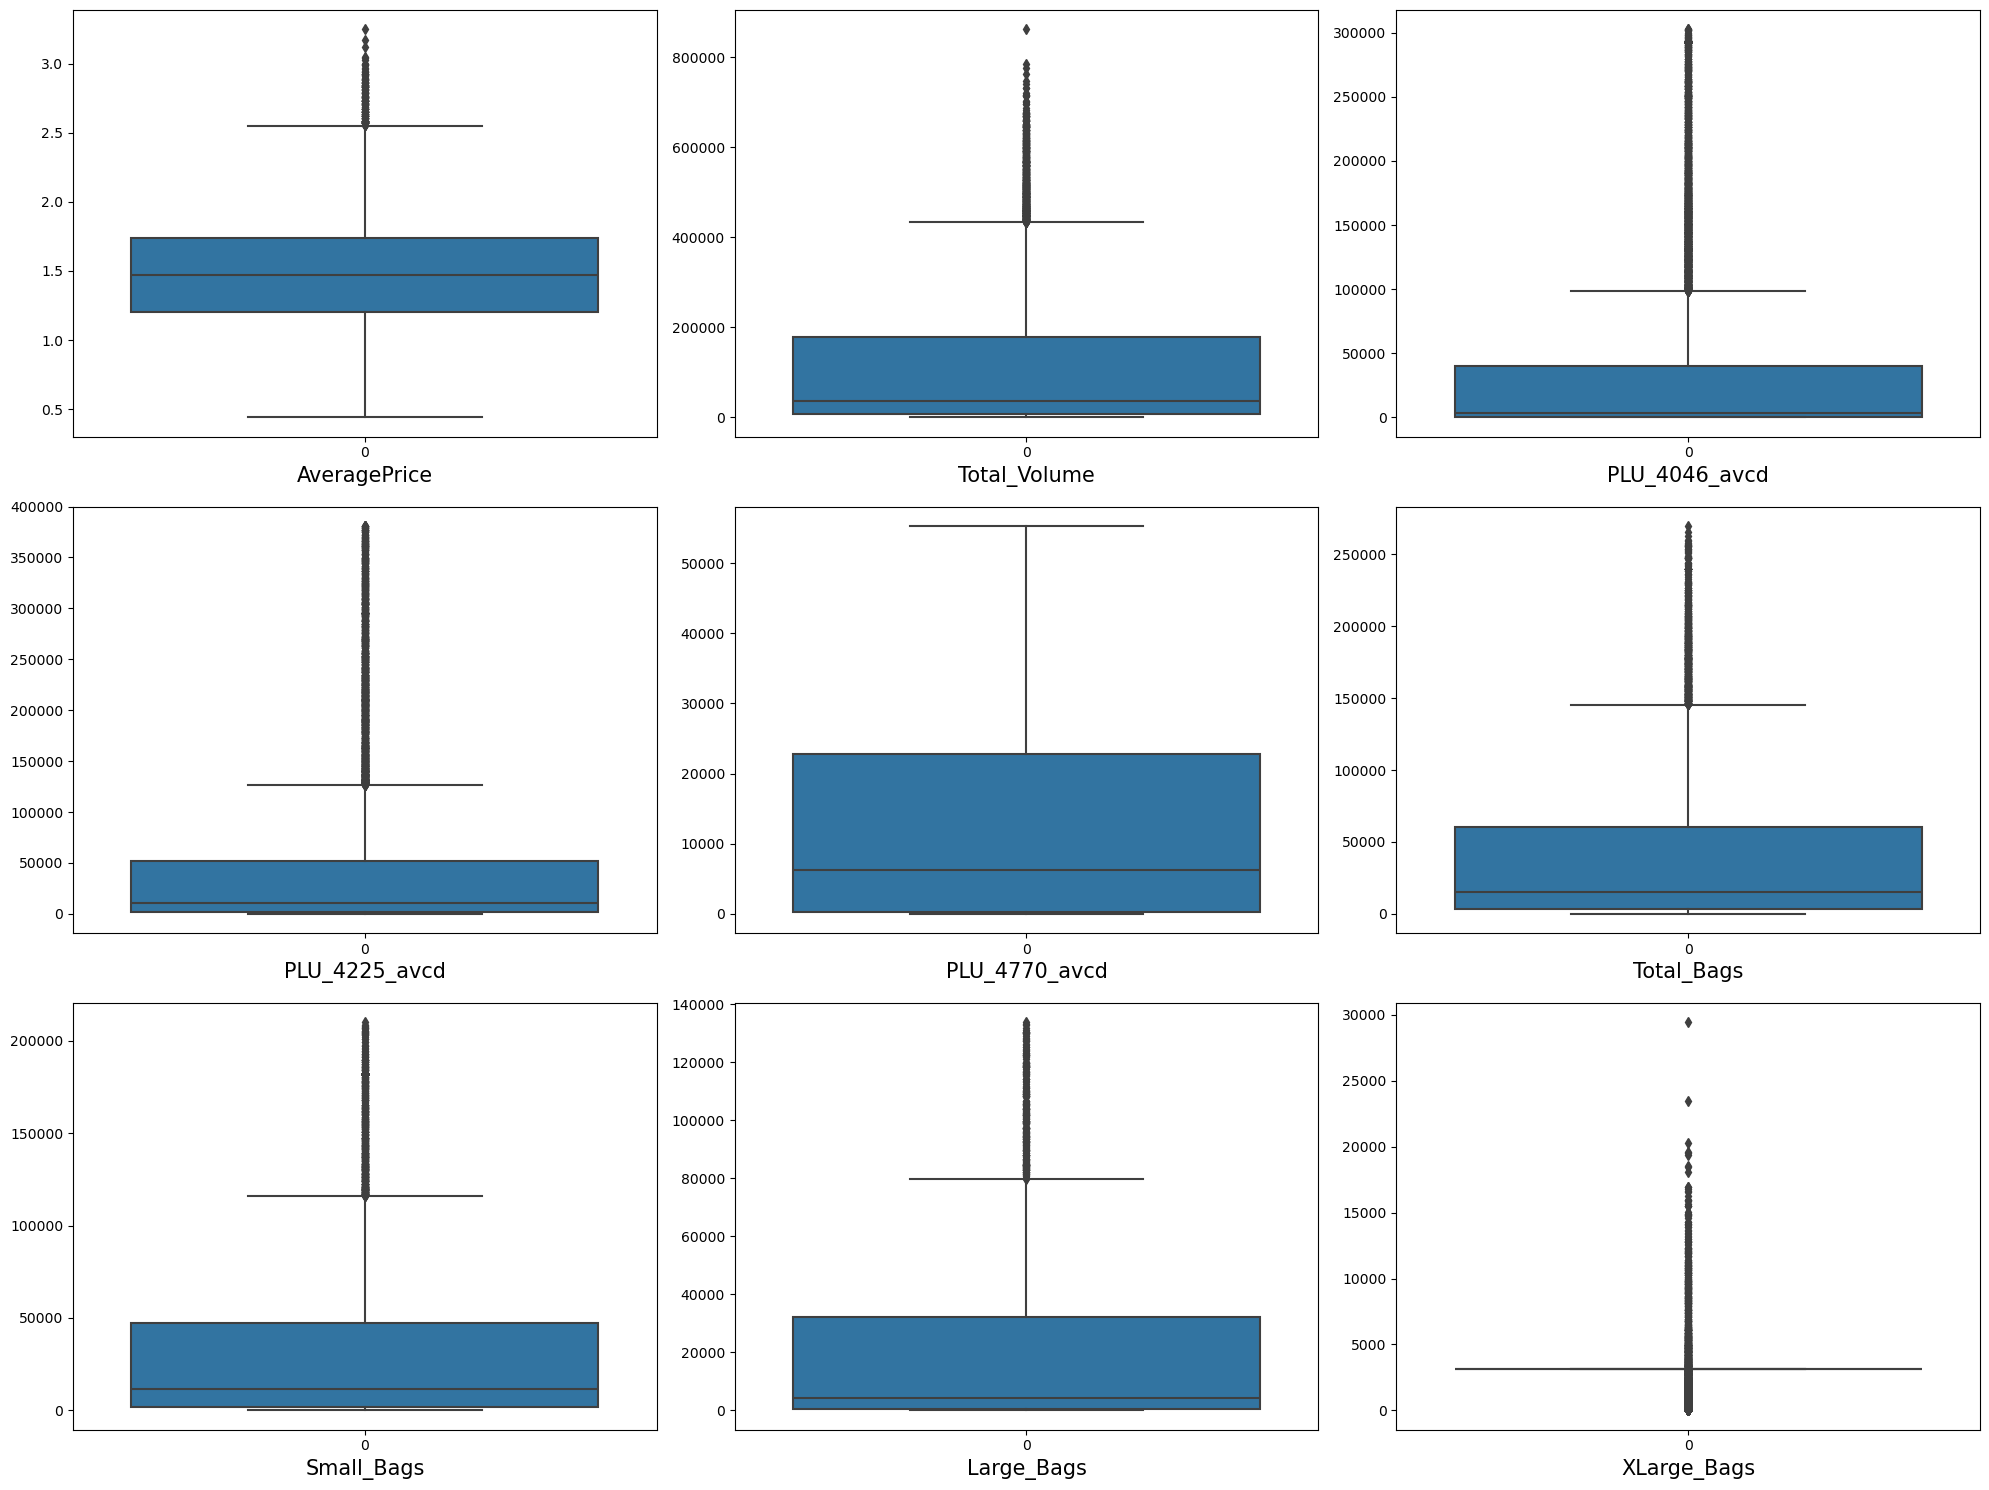

In [73]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber <=9:
        plt.subplot(3,3,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.tight_layout()

<Axes: >

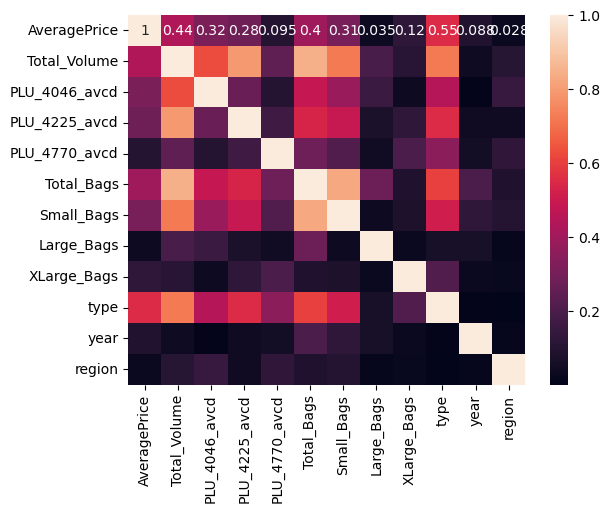

In [74]:
# Calculate the correlation matrix
corr_matrix = df.corr().abs()
sns.heatmap(corr_matrix, annot=True)

In [75]:
corr_matrix

,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
AveragePrice,1.000000,0.436737,0.315036,0.280345,0.095065,0.398110,0.305941,0.034782,0.123524,0.551128,0.087758,0.027522
Total_Volume,0.436737,1.000000,0.628630,0.790721,0.248953,0.845653,0.722014,0.192047,0.106352,0.721864,0.037012,0.105800
PLU_4046_avcd,0.315036,0.628630,1.000000,0.272310,0.096829,0.487028,0.386480,0.154168,0.032850,0.448113,0.005378,0.148465
PLU_4225_avcd,0.280345,0.790721,0.272310,1.000000,0.165283,0.534112,0.492112,0.071472,0.123076,0.551479,0.042610,0.041640
PLU_4770_avcd,0.095065,0.248953,0.096829,0.165283,1.000000,0.281895,0.208343,0.045626,0.196377,0.348194,0.050218,0.126657
Total_Bags,0.398110,0.845653,0.487028,0.534112,0.281895,1.000000,0.828334,0.274497,0.085320,0.600526,0.197995,0.084206
Small_Bags,0.305941,0.722014,0.386480,0.492112,0.208343,0.828334,1.000000,0.033168,0.074674,0.513960,0.123181,0.094183
Large_Bags,0.034782,0.192047,0.154168,0.071472,0.045626,0.274497,0.033168,1.000000,0.027779,0.065423,0.065246,0.014568
XLarge_Bags,0.123524,0.106352,0.032850,0.123076,0.196377,0.085320,0.074674,0.027779,1.000000,0.209216,0.024432,0.020358
type,0.551128,0.721864,0.448113,0.551479,0.348194,0.600526,0.513960,0.065423,0.209216,1.000000,0.007353,0.000471


In [76]:
df.drop(columns=['Total_Bags'], inplace=True)

In [77]:
df.head()

,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,3106.426507,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,3106.426507,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,3106.426507,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,3106.426507,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,3106.426507,0,2015,0


* From the correlation matrix Total bags has high correlation around 0.82 so we'll drop either one feature.

### Regression Model Training

In [78]:
# Splitting the data as Feature and target variable assign as x and y
X=df.drop(columns=['AveragePrice'],axis=1)
y=df[['AveragePrice']]

In [79]:
#standard scaler for the standardized data

scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [80]:
x_scaled.shape

(14236, 10)

In [81]:
#Split the dataset to training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=45)

In [82]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(10677, 10)
(10677, 1)
(3559, 10)
(3559, 1)


In [83]:
#Linear regression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [84]:
#Predict the Average price give feature
df.tail(2)

,AveragePrice,Total_Volume,PLU_4046_avcd,PLU_4225_avcd,PLU_4770_avcd,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,3106.426507,1,2018,53
18248,1.62,17489.58,2894.77,2356.13,224.53,11988.14,26.01,3106.426507,1,2018,53


In [85]:
#Since we vahe already fit the scaler . you can tranform the data .
print("Average price: ",lr.predict(scaler.transform([[17489.58,2894.77,2356.13,224.53,11988.14,26.01,3106.426507,1,2018,53]])))

Average price:  [[1.80043082]]


In [86]:
lr.score(X_train,Y_train)

0.3460439747287456

In [87]:
lr.score(X_test,Y_test)

0.3203767688778395

In [88]:
Y_pred =(lr.predict(X_test))
Y_pred

array([[1.09348846],
       [1.63764117],
       [1.23663796],
       ...,
       [1.66648918],
       [1.22371614],
       [1.30967245]])

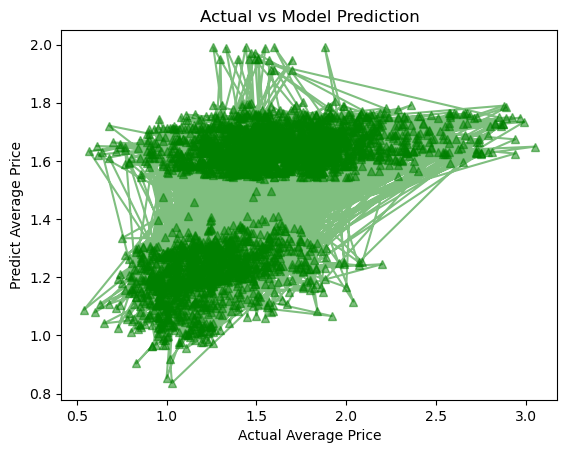

In [89]:
plt.plot(Y_test, Y_pred, marker='^',c='g',alpha=0.5)
plt.xlabel('Actual Average Price')
plt.ylabel('Predict Average Price')
plt.title('Actual vs Model Prediction')
plt.show()

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [91]:
# Mean Absolute error
mean_absolute_error(Y_test,Y_pred)


0.24730170202225854

In [92]:
# Mean Squared error
mean_squared_error(Y_test,Y_pred)


0.10552783126094248

In [93]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

0.3248504752358267

In [94]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [95]:
#LASSOCV will return best alpha after max iteration
#Normalize is subtracting the mean and divide by L2_norm

lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(X_train,Y_train)

LassoCV(max_iter=100)

In [96]:
#best alpha paremeter
alpha=lasscv.alpha_
alpha

0.00021527556409637789

In [97]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.00021527556409637789)

In [98]:
lasso_reg.score(X_test,Y_test)

0.32034616554789186

In [99]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(X_train,Y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [100]:
ridgecv.alpha_

0.09099999999999998

In [101]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,Y_train)

Ridge(alpha=0.09099999999999998)

In [102]:
ridge_model.score(X_test,Y_test)

0.32037687793516334

* For Regression Problem the model is not overfitted it is proved from regularization method.

## CLASSIFICATION PROBLEM

In [103]:
#Splitting the dataset for training and testing set
x = df.drop(columns=['region'],axis=1)
y = df['region']

In [104]:
# Standardization
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)

In [105]:
x_scaled.shape

(14236, 10)

In [106]:
# Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [107]:
x_train.shape

(10677, 10)

In [108]:
y_test.shape

(3559,)

In [109]:
# Train model on logistic regression
clf = LogisticRegression()

In [110]:
clf.fit(x_train,y_train)

LogisticRegression()

In [111]:
# Predict the test set
y_pred=clf.predict(x_test)
y_pred

array([44, 44, 41, ..., 50, 15, 17])

In [112]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.39926945771284067

In [113]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("==================Training Score=================")
        print("Accuracy Score == >  ", accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=clf.predict(x_test)
        print("=================Test Score======================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred)*100)
        print("Classification Report",classification_report(y_test,pred))

In [114]:
#checking train and test score
metrics_score(clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(clf,x_train,x_test,y_train,y_test,train=False)

==================Training Score=================
Accuracy Score == >   40.254753207829914
=================Test Score======================
Accuracy Score==>   39.92694577128407
Classification Report               precision    recall  f1-score   support

           0       0.35      0.76      0.48        94
           1       0.44      0.21      0.28        73
           2       0.25      0.02      0.04        46
           3       0.29      0.62      0.40        86
           4       0.33      0.06      0.10        65
           5       0.73      0.25      0.37        89
           6       0.88      0.59      0.71        37
           7       0.23      0.12      0.15        77
           8       0.68      0.79      0.73        43
           9       0.53      0.52      0.53        81
          10       0.27      0.36      0.31        92
          11       0.12      0.02      0.04        42
          12       0.39      0.54      0.45        52
          13       0.26      0.33      0.2

* For the Regression problem training accuracy around 34% and testing accuracy with 32% with low error metrics that the model is not overfitted which is proved with regularisation method.
* For the Classification Problem training accuracy around 40% and testing accuracy with 39% which is proved with Classification metrics that the model is not overfitted.